In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pycountry
import statsmodels.api as sm

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500


In [2]:
df_gpg = pd.read_csv("../data/gpg.csv")
df_gini = pd.read_csv("../data/gini.csv")
df_bli = pd.read_csv("../data/bli.csv", header = 0)
df_paid_unpaid = pd.read_csv("../data/oecd_Employment_paid_unpaid_work.csv")
df_gender_multiple_factors = pd.read_csv("../data/oecd_gender_multiple_factors.csv")
df_gender_equality_index = pd.read_csv("../data/gender_equality_index_gpg_2017.csv", header = 1)

In [3]:
countries_abbr_to_name = {}
countries_abbr_to_name["UK"] = "United Kingdom"
countries_abbr_to_name["EL"] = "Greece"

for country in list(pycountry.countries):
    countries_abbr_to_name[country.alpha2] = country.name
    countries_abbr_to_name[country.alpha3] = country.name

New try with own gpg data form the same source as gei

In [4]:
df_gender_equality_index = df_gender_equality_index.iloc[:-6]
df_gender_equality_index = df_gender_equality_index.replace(countries_abbr_to_name)


In [5]:
df_gender_equality_index_reduced = df_gender_equality_index[["Country", "Gender Equality Index", "Gender Wage Gap mean monthly earnings"]]

In [6]:
df_gender_equality_index_reduced = df_gender_equality_index_reduced.rename(columns={"Gender Wage Gap mean monthly earnings": "gpg"})

In [20]:
df_gender_equality_index_reduced.head(5)

,Country,Gender Equality Index,gpg,const
0,EU-28,67.4,19.94,1
1,Belgium,71.1,10.84,1
2,Bulgaria,58.8,14.43,1
3,Czech Republic,55.7,23.40,1
4,Denmark,77.5,18.76,1


In [8]:
df_gender_equality_index_reduced["gpg"] = df_gender_equality_index_reduced["gpg"].str.replace("%", "")

In [9]:
df_gender_equality_index_reduced["gpg"] = df_gender_equality_index_reduced["gpg"].astype(float)

In [10]:
df_gender_equality_index_reduced.dtypes

Country                   object
Gender Equality Index    float64
gpg                      float64
dtype: object

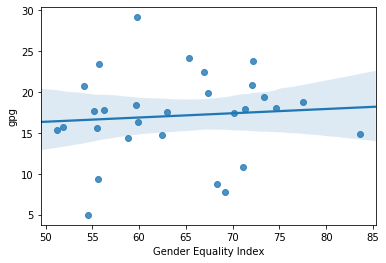

In [11]:
sns.regplot(x = df_gender_equality_index_reduced["Gender Equality Index"], y = df_gender_equality_index_reduced["gpg"])

In [12]:
df_gender_equality_index_reduced = df_gender_equality_index_reduced.assign(const=1)

In [13]:
lin_reg_gei = sm.OLS(df_gender_equality_index_reduced["Gender Equality Index"],
                    df_gender_equality_index_reduced[["const", "gpg"]]).fit()

In [18]:
lin_reg_gei.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Gender Equality Index   R-squared:                       0.007
Model:                               OLS   Adj. R-squared:                 -0.030
Method:                    Least Squares   F-statistic:                    0.1918
Date:                   Thu, 13 Feb 2020   Prob (F-statistic):              0.665
Time:                           14:57:24   Log-Likelihood:                -102.71
No. Observations:                     29   AIC:                             209.4
Df Residuals:                         27   BIC:                             212.2
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.7096      5.524     11.172      0.000      50.376      73.043
gpg            0.1353      0.309      0.438      0.665      -0.499       0.769
==============================================================================
Omnibus:                        1.655   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                1.328
Skew:                           0.338   Prob(JB):                        0.515
Kurtosis:                       2.199   Cond. No.                         61.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df_gender_equality_index = df_gender_equality_index.replace(countries_abbr_to_name)
df_gpg = df_gpg.replace(countries_abbr_to_name)

In [15]:
df_gender_equality_index

,Country,Gender Equality Index,Work,Participation,Segregation and quality of work,Money,Financial resources,Economic situation,Knowledge,Attainment and participation,Segregation,Time,Care activities,Social activities,Power,Political,Economic,Social,Health,Status,Behaviour,Access,Unnamed: 22,Full-time equivalent employment rate (%) W,Full-time equivalent employment rate (%) M,Duration of working life (years) W,Duration of working life (years) M,"Employed people in education, human health and social work activities (%) W","Employed people in education, human health and social work activities (%) M",Ability to take one hour or two off during working hours to take care of personal or family matters (%) W,Ability to take one hour or two off during working hours to take care of personal or family matters (%) M,"Career Prospects Index (points, 0-100) W","Career Prospects Index (points, 0-100) M",Mean monthly earnings (PPS) W,Mean monthly earnings (PPS) M,Gender Wage Gap mean monthly earnings,Mean equivalised net income (PPS) W,Mean equivalised net income (PPS) M,Gender Wage Gap net income,Difference two wage gaps,Not at-risk-of-poverty (%) W,Not at-risk-of-poverty (%) M,Income distribution S20/S80 (%) W,Income distribution S20/S80 (%) M,Graduates of tertiary education (%) W,Graduates of tertiary education (%) M,People participating in formal or non-formal education (%) W,People participating in formal or non-formal education (%) M,"Tertiary students in education, health and welfare, humanities and arts (%) W","Tertiary students in education, health and welfare, humanities and arts (%) M","People caring for and educating their children or grandchildren, elderly or people with disabilities, every day (%) W","People caring for and educating their children or grandchildren, elderly or people with disabilities, every day (%) M","People doing cooking and/or housework, every day (%) W","People doing cooking and/or housework, every day (%) M","Workers doing sporting, cultural or leisure activities outside of their home, at least daily or several times a week (%) W","Workers doing sporting, cultural or leisure activities outside of their home, at least daily or several times a week (%) M","Workers involved in voluntary or charitable activities, at least once a month (%) W","Workers involved in voluntary or charitable activities, at least once a month (%) M",Share of ministers (%) W,Share of ministers (%) M,Share of members of parliament (%) W,Share of members of parliament (%) M,Share of members of regional assemblies (%) W,Share of members of regional assemblies (%) M,"Share of members of boards in largest quoted companies, supervisory board or board of directors (%) W","Share of members of boards in largest quoted companies, supervisory board or board of directors (%) M",Share of board members of central bank (%) W,Share of board members of central bank (%) M,Share of board members of research funding organisations (%) W,Share of board members of research funding organisations (%) M,Share of board members of publically owned broadcasting organisations (%) W,Share of board members of publically owned broadcasting organisations (%) M,Share of members of highest decision making body of the national Olympic sport organisations (%) W,Share of members of highest decision making body of the national Olympic sport organisations (%) M,"Self-perceived health, good or very good (%) W","Self-perceived health, good or very good (%) M",Life expectancy at birth (years) W,Life expectancy at birth (years) M,Healthy life years at birth (years) W,Healthy life years at birth (years) M,People who don't smoke and are not involved in harmful drinking (%) W,People who don't smoke and are not involved in harmful drinking (%) M,People doing physical activities and/or consuming fruits and vegetables (%) W,People doing physical activities and/or consuming fruits and vegetables (%) M,Population without unmet needs for medical examination (%) W,Population without unmet 

In [16]:
df_gpg_reduced

NameError: name 'df_gpg_reduced' is not defined

In [ ]:
df_gei_gpg.sort_values(by=["Gender Equality Index"], ascending=False)

In [ ]:
df_gender_equality_index_reduced = df_gender_equality_index[["Country", "Gender Equality Index"]]

In [ ]:
df_gpg_reduced = df_gpg[["LOCATION", "TIME", "Value"]].loc[df_gpg["TIME"] == 2017]

In [ ]:
df_gei_gpg = df_gender_equality_index_reduced.merge(df_gpg_reduced, left_on = "Country", right_on = "LOCATION").head(100)

In [ ]:
df_gei_gpg.sort_values(by=["Gender Equality Index"], ascending=False)

In [ ]:
sns.regplot(x = df_gei_gpg["Value"], y = df_gei_gpg["Gender Equality Index"])

In [ ]:
sns.regplot(x = df_gpg["TIME"], y = df_gpg["Value"])

In [ ]:
fig, ax = plt.sublots(figsize=(16,9))